In [1]:
import os

In [2]:
os.getcwd()

'c:\\Users\\KimYeonSang\\Desktop\\광인사\\D_L\\content'

In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

import matplotlib.pyplot as plt
from PIL import Image

In [4]:
img=Image.open('C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/daisy/5673551_01d1ea993e_n.jpg')
print('img : ',img)

img :  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x212 at 0x21065A94AF0>


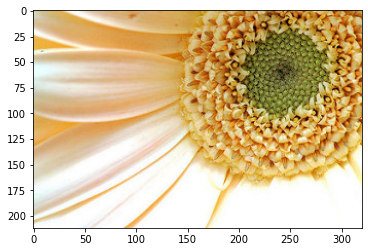

img_array.shape : 
 (212, 320, 3)
img_array : 
 [[[215 214 186]
  [214 210 181]
  [210 205 175]
  ...
  [213 176 105]
  [213 187 112]
  [207 188 111]]

 [[212 215 186]
  [212 212 184]
  [210 209 179]
  ...
  [205 159  82]
  [206 162  87]
  [208 164  89]]

 [[210 216 188]
  [210 214 187]
  [209 212 183]
  ...
  [192 140  56]
  [198 143  61]
  [214 155  75]]

 ...

 [[245 251 249]
  [246 252 250]
  [249 253 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[250 254 253]
  [250 254 253]
  [251 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[252 254 253]
  [252 254 253]
  [253 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [5]:
plt.imshow(img)
plt.show()

img_array = np.array(img)
print("img_array.shape : \n", img_array.shape)
print("img_array : \n", img_array)

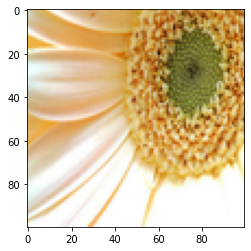

In [6]:
resized = img.resize([100,100])
plt.imshow(resized)
plt.show()
#plt.draw()

In [7]:
path='C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers'
filenames = os.listdir(path)
print("filenames : ", filenames)

filenames :  ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [8]:
def list_dir(path):
    filenames = os.listdir(path)
    filenames.sort()
    return filenames

In [9]:
target_names = list_dir(path)
print("target_names : ", target_names)

target_names :  ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [10]:
for dx, dname in enumerate(target_names):
    print("dname : ",dname)

    subpath= path+'/'+dname #target_names==dname
    print("subpath :",subpath)

    filenames=list_dir(subpath) #[daisy 안에있는 파일,dandelion 안에있는 파일]
    print(filenames[:3])


dname :  daisy
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/daisy
['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg']
dname :  dandelion
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/dandelion
['10043234166_e6dd915111_n.jpg', '10200780773_c6051a7d71_n.jpg', '10294487385_92a0676c7d_m.jpg']
dname :  rose
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/rose
['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg']
dname :  sunflower
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/sunflower
['1008566138_6927679c8a.jpg', '1022552002_2b93faf9e7_n.jpg', '1022552036_67d33d5bd8_n.jpg']
dname :  tulip
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/tulip
['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg']


In [11]:
imagepath=os.path.join(subpath,filenames[3])
print(imagepath)

C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/tulip\10128546863_8de70c610d.jpg


In [12]:
def load_image_pixels(imagepath,resolution) :
    img=Image.open(imagepath)
    img_resized=img.resize(resolution)

    return np.array(img_resized)
resolution=[20,20]
pixels=load_image_pixels(os.path.join(subpath,filenames[3]),resolution)
print("pixels :\n",pixels)  #os.path.join(subpath,filenames[3])자체가 pixel로 출력

pixels :
 [[[131 167 199]
  [135 167 199]
  [142 172 202]
  ...
  [175 195 217]
  [176 195 216]
  [178 196 217]]

 [[175 128 175]
  [142 174 204]
  [151 179 207]
  ...
  [163 187 213]
  [167 189 213]
  [172 192 215]]

 [[204  79 146]
  [157 181 209]
  [160 186 211]
  ...
  [159 186 213]
  [162 186 212]
  [160 185 211]]

 ...

 [[ 33  45  14]
  [ 29  38  12]
  [ 39  49  21]
  ...
  [ 38  44  17]
  [ 29  40  14]
  [ 23  33   5]]

 [[ 24  36  11]
  [ 35  45  16]
  [ 29  40  18]
  ...
  [ 38  47  18]
  [ 17  26   8]
  [ 28  41  16]]

 [[ 25  34  13]
  [ 36  47  16]
  [ 41  53  25]
  ...
  [ 38  48  21]
  [ 11  18   4]
  [ 30  40  21]]]


In [13]:
def flowers_init(resolution) :
    list_dir(path)
    target_names=list_dir(path=path)

    images=[]
    idxs=[]
    #target_names= daisy,rose,tulip...
    #path=C:\Users\KimYeonSang\Desktop\광인사\D_L\content\flowers
    
    for dx, dname in enumerate(target_names):
        print("dname : ",dname)

        subpath= path+'/'+dname #dname=daisy,rose,tulip...
        print("subpath :",subpath)

        filenames=list_dir(subpath) #flowers안의 dname안의 사진
        print(filenames[:3]) #사진파일 3개

        for fname in filenames :
            if fname[-4:] !='.jpg' :
                continue
            imagepath=os.path.join(subpath,fname) #join= 합치기
            pixels = load_image_pixels(imagepath,resolution)

            images.append(pixels)
            idxs.append(dx)

    xs = np.array(images,dtype=np.float32)

    return xs, images, idxs

In [14]:
resolution = [100,100]
xs, images, idxs = flowers_init(resolution=resolution)

dname :  daisy
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/daisy
['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg']
dname :  dandelion
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/dandelion
['10043234166_e6dd915111_n.jpg', '10200780773_c6051a7d71_n.jpg', '10294487385_92a0676c7d_m.jpg']
dname :  rose
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/rose
['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg']
dname :  sunflower
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/sunflower
['1008566138_6927679c8a.jpg', '1022552002_2b93faf9e7_n.jpg', '1022552036_67d33d5bd8_n.jpg']
dname :  tulip
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/tulip
['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg']


In [15]:
print(pd.DataFrame(idxs).value_counts()) #enumerate

1    1052
4     984
2     784
0     764
3     733
dtype: int64


In [16]:
xs # 4차원

array([[[[138., 138., 137.],
         [146., 146., 146.],
         [150., 150., 150.],
         ...,
         [155., 155., 154.],
         [154., 154., 152.],
         [153., 153., 153.]],

        [[137., 137., 134.],
         [145., 145., 144.],
         [148., 147., 148.],
         ...,
         [156., 155., 154.],
         [154., 154., 152.],
         [150., 150., 149.]],

        [[133., 132., 128.],
         [140., 139., 137.],
         [147., 146., 145.],
         ...,
         [156., 156., 154.],
         [153., 153., 152.],
         [146., 145., 145.]],

        ...,

        [[ 42.,  46.,  24.],
         [ 43.,  46.,  24.],
         [ 44.,  47.,  25.],
         ...,
         [129., 125., 124.],
         [127., 123., 121.],
         [129., 125., 123.]],

        [[ 44.,  47.,  26.],
         [ 44.,  47.,  26.],
         [ 46.,  48.,  27.],
         ...,
         [132., 128., 127.],
         [130., 126., 125.],
         [130., 126., 125.]],

        [[ 44.,  47.,  26.],
       

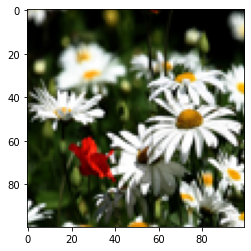

In [17]:
img=xs[5]

img_image=Image.fromarray(np.uint8(img)) #uint=2의 8승까지 표현가능,더 섬세하게 시각화 가능

plt.imshow(img_image)
plt.show()

In [18]:
img

array([[[162., 156., 130.],
        [193., 194., 177.],
        [199., 201., 183.],
        ...,
        [  5.,   9.,   7.],
        [  7.,  10.,   9.],
        [  5.,   8.,   7.]],

       [[179., 179., 160.],
        [204., 206., 197.],
        [199., 202., 194.],
        ...,
        [ 47.,  58.,  55.],
        [ 34.,  42.,  39.],
        [ 36.,  41.,  39.]],

       [[188., 182., 166.],
        [195., 193., 187.],
        [181., 185., 183.],
        ...,
        [117., 128., 125.],
        [ 88.,  99.,  95.],
        [ 89.,  98.,  95.]],

       ...,

       [[180., 191., 176.],
        [148., 158., 150.],
        [ 78.,  90.,  78.],
        ...,
        [247., 249., 251.],
        [232., 232., 229.],
        [237., 228., 201.]],

       [[ 55.,  69.,  41.],
        [ 30.,  45.,  21.],
        [ 19.,  33.,  12.],
        ...,
        [245., 245., 246.],
        [247., 247., 248.],
        [247., 248., 251.]],

       [[ 83.,  94.,  76.],
        [ 90., 104.,  90.],
        [123., 1

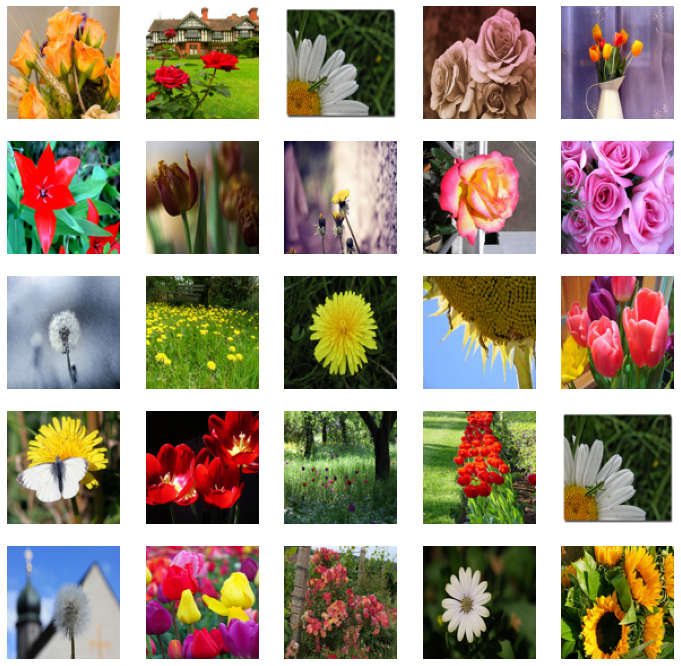

In [19]:
plt.figure(figsize=(12,12))

for i in range(25) : 
    plt.subplot(5,5,i+1)
    i=np.random.choice(4317)
    img = xs[i]
    img_image=Image.fromarray(np.uint8(img))
    plt.axis('off')
    plt.imshow(img_image)
    
plt.show()

In [20]:
np.eye(5) #one-hot-vector

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [21]:
print("np.eye(5)[3] :",(np.eye(5)[3]))
print("np.eye(5)[4] :",(np.eye(5)[4]))

np.eye(5)[3] : [0. 0. 0. 1. 0.]
np.eye(5)[4] : [0. 0. 0. 0. 1.]


In [22]:
def onehot(cnt,idxs) :
    return np.eye(cnt)[idxs]

In [23]:
cnt=len(target_names) #종속변수
idxs=1

In [24]:
ys = onehot(cnt,1)
print(ys)

[0. 1. 0. 0. 0.]


In [25]:
def flowers_init(resolution) :
    list_dir(path)
    target_names=list_dir(path=path)

    images=[]
    idxs=[]
    #target_names= daisy,rose,tulip...
    #path=C:\Users\KimYeonSang\Desktop\광인사\D_L\content\flowers
    
    for dx, dname in enumerate(target_names):
        print("dname : ",dname)

        subpath= path+'/'+dname #dname=daisy,rose,tulip...
        print("subpath :",subpath)

        filenames=list_dir(subpath) #flowers안의 dname안의 사진
        print(filenames[:3]) #사진파일 3개

        for fname in filenames : #.jpg파일만 걸러내기
            if fname[-4:] !='.jpg' :
                continue
            imagepath=os.path.join(subpath,fname) #join= 합치기
            pixels = load_image_pixels(imagepath,resolution)

            images.append(pixels)
            idxs.append(dx) #독립변수

    xs = np.array(images,dtype=np.float32) #이미지를 어레이한것

    ys=onehot(cnt=len(target_names),idxs=idxs)

    return xs, ys

In [26]:
xs, ys = flowers_init(resolution=resolution)

dname :  daisy
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/daisy
['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg']
dname :  dandelion
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/dandelion
['10043234166_e6dd915111_n.jpg', '10200780773_c6051a7d71_n.jpg', '10294487385_92a0676c7d_m.jpg']
dname :  rose
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/rose
['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg']
dname :  sunflower
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/sunflower
['1008566138_6927679c8a.jpg', '1022552002_2b93faf9e7_n.jpg', '1022552036_67d33d5bd8_n.jpg']
dname :  tulip
subpath : C:/Users/KimYeonSang/Desktop/광인사/D_L/content/flowers/tulip
['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg']


In [27]:
print("xs.shape :", xs.shape)
print("ys.shape :", ys.shape)

xs.shape : (4317, 100, 100, 3)
ys.shape : (4317, 5)


In [28]:
ys[10]

array([1., 0., 0., 0., 0.])

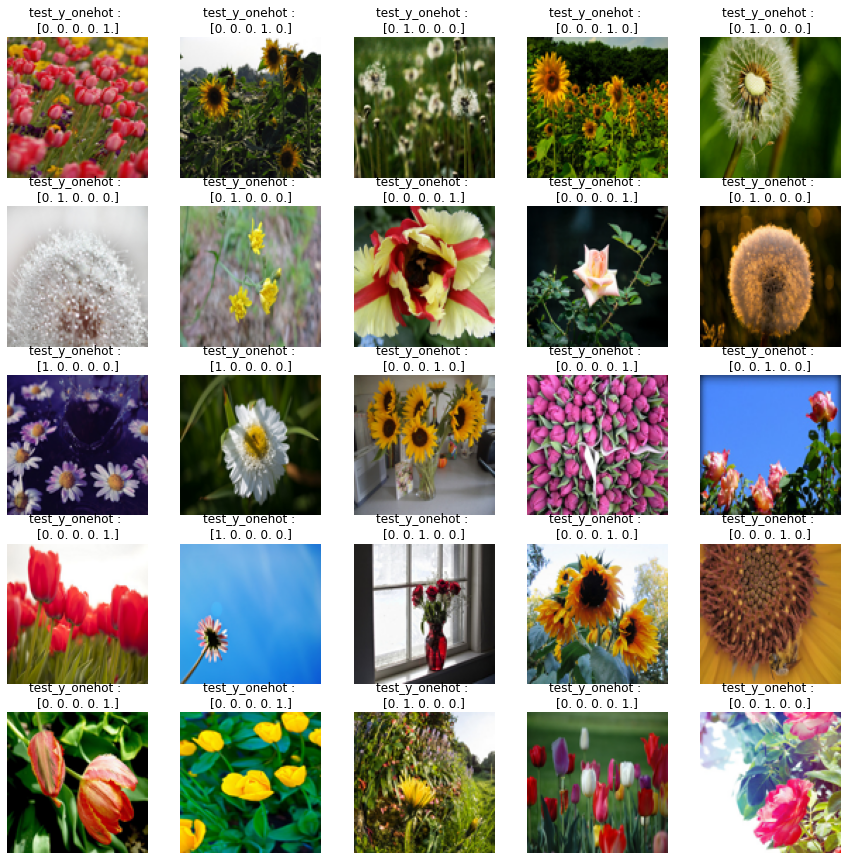

In [29]:
plt.figure(figsize=(15,15))


for i in range(25) : #25개의 사진만 보겠다
    plt.subplot(5,5,i+1)
    i=np.random.choice(4316) #독립변수 4316개 중 랜덤추출
    img = xs[i]
    img_image = Image.fromarray(np.uint8(img))
    plt.title('test_y_onehot : \n{}'.format(ys[i]))
    plt.axis('off')
    plt.imshow(img_image)

plt.show()

In [30]:
print("xs.max() :", xs.max())
print("xs.min() :", xs.min())

xs.max() : 255.0
xs.min() : 0.0


In [31]:
xs_norm = xs / 255.0 #정규화

In [32]:
print(xs_norm.min())
print(xs_norm.max())

0.0
1.0


In [33]:
xs_norm.shape

(4317, 100, 100, 3)

In [34]:
shuffle_map = np.arange(xs_norm.shape[0])
np.random.shuffle(shuffle_map)
print(shuffle_map)

[3324 2810 4131 ... 2596 3872 1227]


In [35]:
train_ratio = 0.8

test_begin_index = int(xs_norm.shape[0] * train_ratio)
print("test_begin_index : ", test_begin_index)

test_begin_index :  3453


In [36]:
train_x = xs_norm[shuffle_map[:test_begin_index]]
test_x  = xs_norm[shuffle_map[test_begin_index:]]

train_y = ys[shuffle_map[:test_begin_index]]
test_y  = ys[shuffle_map[test_begin_index:]]

In [37]:
print("train_x.shape : ", train_x.shape)
print("train_y.shape : ", train_y.shape)
print("test_x.shape : ", test_x.shape)
print("test_y.shape : ", test_y.shape)

train_x.shape :  (3453, 100, 100, 3)
train_y.shape :  (3453, 5)
test_x.shape :  (864, 100, 100, 3)
test_y.shape :  (864, 5)


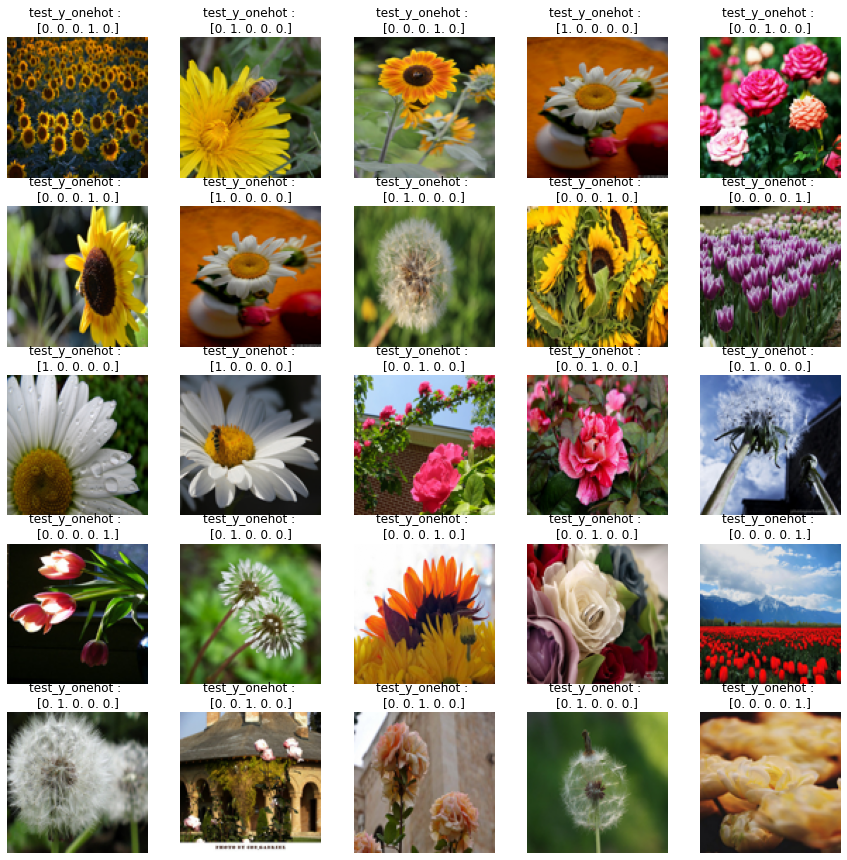

In [38]:
plt.figure(figsize=(15,15))


for i in range(25) : #25개의 사진만 보겠다
    plt.subplot(5,5,i+1)
    i=np.random.choice(3453) #독립변수 3453개 중 랜덤추출
    img = train_x[i]  #train_x는 정규화를 시켜서 0~1까지의 소수, 따라서 밑의 코드 사용못함(주석처리)
    #img_image = Image.fromarray(np.uint8(img)) 
    plt.title('test_y_onehot : \n{}'.format(train_y[i]))
    plt.axis('off')
    plt.imshow(img)

plt.show()

In [39]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3),kernel_size=(3,3),
    filters=16, strides = (1,1),padding = 'valid'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dense(units=5, activation = 'softmax') #선택분류의 활성화함수 =softmax
]) #합성곱 층


In [40]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 565504)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               72384640  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 72,408,869
Trainable params: 72,408,869
Non-trainable params: 0
____________________________________________

In [41]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3),kernel_size=(3,3),filters=32),
    tf.keras.layers.MaxPool2D(strides = (2,2),pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 64),
    tf.keras.layers.AvgPool2D(strides = (2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Dense(units=5, activation = 'softmax')
]) #pooling 층

In [42]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
average_pooling2d (AveragePo (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 56448)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [43]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                loss='categorical_crossentropy',#분류
                metrics=[tf.keras.metrics.TruePositives(name='TP'),#참인것을 맞춘다.
                        tf.keras.metrics.FalsePositives(name='FP')])#거짓인것을 맞춘다.

In [44]:
history = model_1.fit(train_x, train_y,
                      epochs = 50,
                      validation_split = 0.2,
                      batch_size = 32)

Epoch 1/50
87/87 [==============================] - 23s 259ms/step - loss: 1.4950 - TP: 12.0000 - FP: 10.0000 - val_loss: 1.3896 - val_TP: 6.0000 - val_FP: 3.0000
Epoch 2/50
87/87 [==============================] - 22s 256ms/step - loss: 1.3446 - TP: 148.0000 - FP: 97.0000 - val_loss: 1.3028 - val_TP: 62.0000 - val_FP: 30.0000
Epoch 3/50
87/87 [==============================] - 22s 250ms/step - loss: 1.2801 - TP: 366.0000 - FP: 190.0000 - val_loss: 1.2344 - val_TP: 106.0000 - val_FP: 51.0000
Epoch 4/50
87/87 [==============================] - 22s 256ms/step - loss: 1.2174 - TP: 552.0000 - FP: 258.0000 - val_loss: 1.2131 - val_TP: 126.0000 - val_FP: 74.0000
Epoch 5/50
87/87 [==============================] - 22s 250ms/step - loss: 1.1943 - TP: 611.0000 - FP: 279.0000 - val_loss: 1.1918 - val_TP: 145.0000 - val_FP: 77.0000
Epoch 6/50
87/87 [==============================] - 22s 251ms/step - loss: 1.1782 - TP: 710.0000 - FP: 338.0000 - val_loss: 1.1919 - val_TP: 179.0000 - val_FP: 96.0000

In [45]:
model_1.save('flowers_init_1.h5')

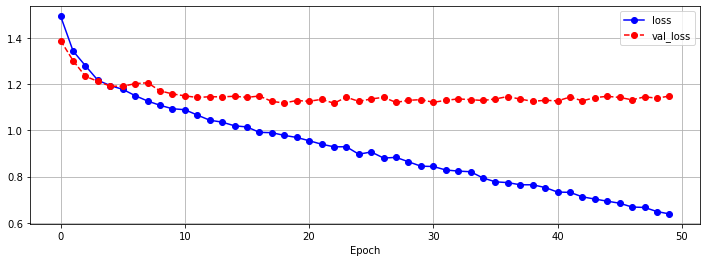

In [46]:
plt.figure(figsize = (12,4))

plt.plot(history.history['loss'],    'b-o', label = 'loss')
plt.plot(history.history['val_loss'],'r--o',label = 'val_loss')
plt.xlabel('Epoch')

plt.grid()
plt.legend()
plt.show()

In [47]:
model_1 = tf.keras.models.load_model('flowers_model_1.h5')

In [48]:
model_1.evaluate(test_x, test_y)

27/27 [==============================] - 2s 67ms/step - loss: 0.7830 - true_positives: 520.0000 - False_positives: 118.0000


[0.7830280065536499, 520.0, 118.0]

In [49]:
pred_y = model_1.predict(test_x)
print(np.round(pred_y),3)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]] 3


pred_y_12 -> 1
pred_y_12 -> 1


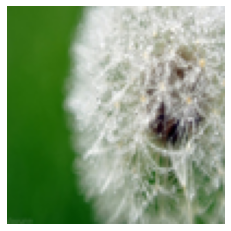

In [50]:
test_index = 12
print("pred_y_{} -> {}".format(test_index, np.argmax(pred_y[test_index])))

print("pred_y_{} -> {}".format(test_index, np.argmax(pred_y[test_index])))
img = test_x[test_index]
plt.imshow(img)
plt.axis('off')
plt.show()

pred_y_15 -> 4
test_y_15 -> 4
pred_y_Prob : [0.01  0.011 0.157 0.004 0.818]


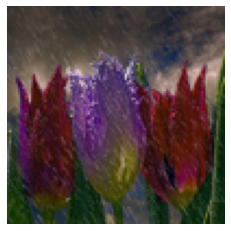

In [51]:
test_index = 15
print("pred_y_{} -> {}".format(test_index, np.argmax(pred_y[test_index])))

print("test_y_{} -> {}".format(test_index, np.argmax(test_y[test_index])))

print("pred_y_Prob : {}".format(np.round(pred_y[test_index],3)))

img = test_x[test_index]
plt.imshow(img)
plt.axis('off')
plt.show()